In [1]:
from functions_for_all_nutrients import *
from vitamin_a_and_zinc_functions import *

In [2]:
location_ids = [179,
 163,
 214,
 161,
 165,
 190,
 189,
 196,
 201,
 180,
 15,
 164,
 20,
 202,
 205,
 171,
 11,
 184,
 168,
 6,
 141,
 207,
 181,
 213,
 522]

In [3]:
focus_location_ids = [214,179,163
                     ]

In [4]:
iron_bw_250 = pd.read_csv('results_raw/iron_bw_results.csv')
    # read in zero fortification results for wheat flour and maize
iron_bw_250_zero = pd.read_csv('results_raw/iron_bw_results_zero_2021_04_14.csv')
iron_bw_250_zero['coverage_level'] = 1
    # duplicate zero wheat flour for zero industry wheat flour because they are the same data
iron_bw_250_zero = pd.read_csv('results_raw/iron_bw_results_zero_2021_04_14.csv')
iron_bw_250_zero['coverage_level'] = 1
iron_bw_250_zero_wheat = iron_bw_250_zero.loc[iron_bw_250_zero.vehicle=='zero wheat flour']
iron_bw_250_zero_wheat['vehicle'] = 'zero industry wheat'
iron_bw_250_zero = pd.concat([iron_bw_250_zero, iron_bw_250_zero_wheat], ignore_index=True, sort=True)

    # read in industry wheat flour data
iron_bw_250_wheat = pd.read_csv('results_raw/iron_bw_results_industry_wheat_2021_04_15.csv')
iron_bw_250 = pd.concat([iron_bw_250, 
                         iron_bw_250_wheat,
                         iron_bw_250_zero], ignore_index=True, sort=True)

iron_bw_250 = iron_bw_250.set_index(['location_id', 'measure', 'vehicle','coverage_level']).stack().reset_index()

iron_bw_1000 = (pd.concat([iron_bw_250, iron_bw_250, iron_bw_250, iron_bw_250], ignore_index=True)
                .rename(columns={'level_4':'draw',0:'value'})
                .set_index(['location_id','measure','vehicle','coverage_level'])
                .sort_index())
draws = []
for i in list(range(0,1000)):
    draws.append(f'draw_{i}')
iron_bw_1000['draw'] = draws * int(len(iron_bw_1000) / 1000)
iron_bw_1000 = iron_bw_1000.reset_index()
iron_bw_1000 = iron_bw_1000.pivot_table(index=['location_id', 'measure', 'vehicle','coverage_level'],
                                       columns='draw', values='value').reset_index()
iron_bw_1000['year'] = 2025
iron_bw_1000['nutrient'] = 'iron'

iron_bw_1000 = (iron_bw_1000.set_index(['location_id', 'vehicle', 'coverage_level', 'year', 'measure'])
                .drop(columns='nutrient')
                .sort_index())

iron_bw_1000.head()

draw                                                                draw_0  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  5272.011695   
                                               pif                0.177321   
                                               rates_averted      6.847575   
                           0.5            2025 counts_averted  6439.973114   
                                               pif                0.216605   

draw                                                                draw_1  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  1883.106801   
                                               pif                0.061071   
                                               rates_averted      2.439305   
                           0.5            2025 counts_averted  2293.029855   
                                               pif                0.074365   

draw                                                               draw_10  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  2225.781747   
                                               pif                0.082930   
                                               rates_averted      2.639266   
                           0.5            2025 counts_averted  2763.342705   
                                               pif                0.102959   

draw                                                              draw_100  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  4091.632163   
                                               pif                0.131400   
                                               rates_averted      5.659770   
                           0.5            2025 counts_averted  4925.127693   
                                               pif                0.158168   

draw                                                              draw_101  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  2280.219734   
                                               pif                0.072219   
                                               rates_averted      2.736006   
                           0.5            2025 counts_averted  2832.952811   
                                               pif                0.089725   

draw                                                              draw_102  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  5065.137185   
                                               pif                0.166774   
                                               rates_averted      5.979867   
                           0.5            2025 counts_averted  6235.049115   
                                               pif                0.205294   

draw                                                              draw_103  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  3134.381818   
                                               pif                0.106181   
                                               rates_averted      4.268250   
                           0.5            2025 counts_averted  3922.999312   
                                               pif                0.132897   

draw                                                              draw_104  \
location_id vehicle        coverage_level year measure                       
6           ind

In [5]:
iron_u5 = pd.read_pickle('results_raw/iron_u5.pkl')
iron_wra = pd.read_pickle('results_raw/iron_wra.pkl')
iron = (iron_u5.set_index([c for c in iron_u5.columns if 'draw' not in c])
        + iron_wra.set_index([c for c in iron_u5.columns if 'draw' not in c])).reset_index()
iron = iron.loc[iron.vehicle!='industry wheat'].loc[iron.vehicle!='zero industry wheat']
iron_u5_industry = pd.read_pickle('results_raw/iron_u5_industry_wheat_update.pkl')
iron_wra_industry = pd.read_pickle('results_raw/iron_wra_industry_wheat_update.pkl')
iron_industry = (iron_u5_industry.set_index([c for c in iron_u5_industry.columns if 'draw' not in c])
        + iron_wra_industry.set_index([c for c in iron_u5_industry.columns if 'draw' not in c])).reset_index()
iron = (pd.concat([iron, iron_industry], ignore_index=True)
        .set_index(['location_id','vehicle','coverage_level','year','measure'])
        .sort_index())


iron = (iron + iron_bw_1000).reset_index()
iron['nutrient'] = 'iron'
#iron = iron.loc[iron.location_id!=11]
iron.head()

draw,location_id,vehicle,coverage_level,year,measure,draw_0,draw_1,draw_10,draw_100,draw_101,...,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,nutrient
0,6,industry wheat,0.2,2025,counts_averted,51673.405251,19549.226666,19043.571603,19450.892758,44994.207940,...,27339.289394,69389.515578,60546.456023,18629.879044,29792.368807,49206.056819,21380.520946,23394.936407,25758.534147,iron
1,6,industry wheat,0.2,2025,pif,7.797253,2.859420,4.034359,2.580310,8.345024,...,4.010431,8.699419,10.177575,2.638738,5.417385,16.020701,3.575546,4.841922,4.183111,iron
2,6,industry wheat,0.2,2025,rates_averted,21.448323,7.769530,7.796872,10.588757,15.771744,...,11.222390,23.807823,21.799292,8.782698,11.505288,16.822807,9.197649,8.921448,11.349719,iron
3,6,industry wheat,0.5,2025,counts_averted,118393.738512,45908.191122,44203.175877,42903.608041,106488.767966,...,62958.761284,162792.582202,142365.544931,41844.667447,70875.962340,116341.532509,49895.463751,55194.641743,59581.843232,iron
4,6,industry wheat,0.5,2025,pif,18.620829,6.983733,9.840817,6.215665,20.170992,...,9.715831,20.813438,24.391102,6.401204,13.184737,38.668411,8.749146,11.829280,10.182059,iron


In [6]:
# exclude old industry wheat flour results
iron_u5 = pd.read_pickle('results_raw/iron_u5.pkl')
iron_wra = pd.read_pickle('results_raw/iron_wra.pkl')
iron_no_bw = (iron_u5.set_index([c for c in iron_u5.columns if 'draw' not in c])
        + iron_wra.set_index([c for c in iron_u5.columns if 'draw' not in c])).reset_index()
iron_no_bw = iron_no_bw.loc[iron_no_bw.vehicle!='industry wheat'].loc[iron_no_bw.vehicle!='zero industry wheat']

# read in new industry wheat results
iron_u5_industry = pd.read_pickle('results_raw/iron_u5_industry_wheat_update.pkl')
iron_wra_industry = pd.read_pickle('results_raw/iron_wra_industry_wheat_update.pkl')
iron_industry = (iron_u5_industry.set_index([c for c in iron_u5_industry.columns if 'draw' not in c])
        + iron_wra_industry.set_index([c for c in iron_u5_industry.columns if 'draw' not in c])).reset_index()

iron_no_bw = pd.concat([iron_no_bw, iron_industry], ignore_index=True, sort=True)
iron_no_bw['nutrient'] = 'iron'
#iron_no_bw = iron_no_bw.loc[iron_no_bw.location_id!=11]
iron_no_bw.head()

draw,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,measure,vehicle,year,nutrient
0,0.2,7.637104,2.594938,4.244068,2.600310,9.917857,7.415747,1.359985,9.339937,2.098922,...,5.995712,19.516659,3.225155,5.609841,4.508586,6,pif,wheat flour,2025,iron
1,0.5,18.444249,6.412946,10.447877,6.427747,23.931951,17.973933,3.378713,22.596008,5.196005,...,14.621292,46.863803,7.979410,13.760003,11.118319,6,pif,wheat flour,2025,iron
2,0.8,28.518511,10.143435,16.462191,10.169190,36.971948,27.888751,5.372214,34.994941,8.232532,...,22.823962,72.057968,12.635163,21.603147,17.548336,6,pif,wheat flour,2025,iron
3,1.0,34.851665,12.582768,20.369321,12.616610,45.156683,34.160031,6.687347,42.810254,10.223791,...,28.067523,87.742360,15.685192,26.667029,21.737397,6,pif,wheat flour,2025,iron
4,0.2,-1.054964,-0.352196,-0.577747,-0.352869,-1.371197,-1.021647,-0.183859,-1.288579,-0.284504,...,-0.822127,-2.709054,-0.437354,-0.765872,-0.612949,6,pif,zero wheat flour,2025,iron


In [7]:
zinc = pd.read_pickle('results_raw/zinc.pkl')
#zinc = zinc.loc[zinc.location_id!=11]
zinc['nutrient'] = 'zinc'
#vitamin_a = pd.read_pickle('results_raw/vitamin_a.pkl')
#vitamin_a['nutrient'] = 'vitamin a'
folic_acid = pd.read_pickle('results_raw/folic_acid_waterfall_salt.pkl')
#folic_acid = folic_acid.loc[folic_acid.location_id!=11]
folic_acid['nutrient'] = 'folic acid'

In [8]:
vehicles = ['zero maize flour', 'maize flour', 'zero industry wheat',
       'industry wheat', 'zero wheat flour', 'wheat flour',
       'zero industry salt', 'industry salt', 'zero salt', 'salt',
           'oil','industry oil','zero oil','zero industry oil']

In [9]:
vitamin_a_no_oil = pd.read_pickle('results_raw/vitamin_a.pkl')
vitamin_a_no_oil = vitamin_a_no_oil.loc[vitamin_a_no_oil.vehicle.isin([v for v in vehicles if 'oil' not in v])]
vitamin_a_oil = pd.read_pickle('results_raw/vitamin_a_oil_update.pkl')
vitamin_a = pd.concat([vitamin_a_no_oil, vitamin_a_oil], ignore_index=True)
vitamin_a['nutrient'] = 'vitamin a'
vitamin_a.head()

draws,location_id,year,vehicle,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,...,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,measure,nutrient
0,6,2021,industry wheat,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pif,vitamin a
1,6,2021,industry wheat,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pif,vitamin a
2,6,2021,industry wheat,0.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pif,vitamin a
3,6,2021,industry wheat,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pif,vitamin a
4,6,2021,wheat flour,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pif,vitamin a


In [10]:
results = pd.concat([iron,
                    zinc,
                    vitamin_a,
                    folic_acid.rename(columns={'year_id':'year'})], ignore_index=True, sort=True).drop(columns='index')

results_no_bw = pd.concat([iron_no_bw,
                    zinc,
                    vitamin_a,
                    folic_acid.rename(columns={'year_id':'year'})], ignore_index=True, sort=True).drop(columns='index')

results.head()

,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,measure,nutrient,vehicle,year
0,0.2,51673.405251,19549.226666,19043.571603,19450.892758,44994.207940,43134.120469,10047.001564,52037.207011,20913.910648,...,29792.368807,49206.056819,21380.520946,23394.936407,25758.534147,6,counts_averted,iron,industry wheat,2025
1,0.2,7.797253,2.859420,4.034359,2.580310,8.345024,6.618516,1.304652,8.074238,2.368515,...,5.417385,16.020701,3.575546,4.841922,4.183111,6,pif,iron,industry wheat,2025
2,0.2,21.448323,7.769530,7.796872,10.588757,15.771744,18.138735,6.473935,22.225264,8.976692,...,11.505288,16.822807,9.197649,8.921448,11.349719,6,rates_averted,iron,industry wheat,2025
3,0.5,118393.738512,45908.191122,44203.175877,42903.608041,106488.767966,98820.010367,21105.860215,120192.415365,48422.919236,...,70875.962340,116341.532509,49895.463751,55194.641743,59581.843232,6,counts_averted,iron,industry wheat,2025
4,0.5,18.620829,6.983733,9.840817,6.215665,20.170992,15.906415,3.112570,19.449446,5.752664,...,13.184737,38.668411,8.749146,11.829280,10.182059,6,pif,iron,industry wheat,2025


In [11]:
results.loc[results.location_id==11].loc[results.vehicle=='industry wheat'].nutrient.unique()

array(['iron', 'zinc', 'folic acid'], dtype=object)

In [12]:
counts = results.loc[results.measure=='counts_averted'].loc[results.year==2025]
counts_global = counts.groupby([c for c in counts.columns if 'draw' not in c and c != 'location_id']).sum().reset_index()
counts_global['location_id'] = 1
counts_focus_locs = (counts.loc[counts.location_id.isin(focus_location_ids)]
              .groupby([c for c in counts.columns if 'draw' not in c and c != 'location_id']).sum().reset_index())
counts_focus_locs['location_id'] = 2
counts = pd.concat([counts, counts_global, counts_focus_locs], ignore_index=True, sort=True)

counts_by_vehicle = counts.groupby([c for c in counts.columns if 'draw' not in c and c != 'nutrient']).sum().reset_index()
counts_by_vehicle['nutrient'] = 'all'
counts = pd.concat([counts, counts_by_vehicle], ignore_index=True, sort=True).drop(columns=['measure','year'])
counts.head()

,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,nutrient,vehicle
0,0.2,51673.405251,19549.226666,19043.571603,19450.892758,44994.207940,43134.120469,10047.001564,52037.207011,20913.910648,...,60546.456023,18629.879044,29792.368807,49206.056819,21380.520946,23394.936407,25758.534147,6,iron,industry wheat
1,0.5,118393.738512,45908.191122,44203.175877,42903.608041,106488.767966,98820.010367,21105.860215,120192.415365,48422.919236,...,142365.544931,41844.667447,70875.962340,116341.532509,49895.463751,55194.641743,59581.843232,6,iron,industry wheat
2,0.8,180562.837648,71580.315477,68629.363575,65903.897163,164377.839157,151425.488789,31963.593437,184601.709223,75386.406985,...,217683.334044,64620.323104,110172.477772,179136.512356,77693.841622,86069.357979,92554.523673,6,iron,industry wheat
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,iron,industry wheat
4,0.2,51937.643480,18293.270281,20209.716836,20893.049294,53484.619919,49537.800291,10829.449047,60922.599230,19790.612736,...,66652.976846,17706.884741,32907.326004,59270.812882,19667.331538,27081.305777,28632.920051,6,iron,wheat flour


In [13]:
counts_no_bw = results_no_bw.loc[results_no_bw.measure=='counts_averted'].loc[results_no_bw.year==2025]
counts_no_bw_global = counts_no_bw.groupby([c for c in counts_no_bw.columns if 'draw' not in c and c != 'location_id']).sum().reset_index()
counts_no_bw_global['location_id'] = 1
counts_no_bw_focus_locs = (counts_no_bw.loc[counts_no_bw.location_id.isin(focus_location_ids)]
              .groupby([c for c in counts_no_bw.columns if 'draw' not in c and c != 'location_id']).sum().reset_index())
counts_no_bw_focus_locs['location_id'] = 2
counts_no_bw = pd.concat([counts_no_bw, counts_no_bw_global, counts_no_bw_focus_locs], ignore_index=True, sort=True)

counts_no_bw_by_vehicle = counts_no_bw.groupby([c for c in counts_no_bw.columns if 'draw' not in c and c != 'nutrient']).sum().reset_index()
counts_no_bw_by_vehicle['nutrient'] = 'all'
counts_no_bw = pd.concat([counts_no_bw, counts_no_bw_by_vehicle], ignore_index=True, sort=True).drop(columns=['measure','year'])
counts_no_bw.head()

,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,nutrient,vehicle
0,0.2,46505.884893,16382.039118,18063.177350,16308.587421,51206.050559,43754.288571,7844.068160,55217.591044,16787.970834,...,63279.662641,13726.681998,31464.260830,57438.837049,17464.722476,25264.156256,24978.217913,6,iron,wheat flour
1,0.5,112196.767793,40481.991305,44460.539166,40298.338114,123519.397218,105969.086382,19483.103177,133537.787445,41566.065359,...,151754.438104,34003.313000,76661.698430,137845.842520,43199.651920,61999.155525,61583.820971,6,iron,wheat flour
2,0.8,173288.068580,64024.859450,70042.773186,63730.915892,190740.213968,164294.951187,30971.267017,206726.654663,65866.918054,...,233003.240683,53909.293005,119562.730057,211805.145012,68389.093987,97381.933436,97177.736224,6,iron,wheat flour
3,1.0,211610.862540,79416.455437,86656.612677,79048.908107,232887.230290,201131.526473,38547.113901,252817.570717,81806.422333,...,283424.980902,66977.014812,146942.793603,257770.134270,84884.016064,120241.705236,120357.242213,6,iron,wheat flour
4,0.2,-6429.125451,-2223.569991,-2459.205339,-2213.737425,-7080.853983,-6031.263654,-1060.639130,-7619.961771,-2275.291683,...,-8788.183985,-1859.692109,-4317.211937,-7975.571267,-2368.754501,-3447.758517,-3396.363574,6,iron,zero wheat flour


In [14]:
gbd_data_dir = '/ihme/homes/alibow/notebooks/vivarium_research_lsff/gbd_data_summary/output_data/'

In [15]:
gbd_data_directory = '/share/scratch/users/ndbs/vivarium_lsff/gbd_data'
gbd_data_filepath = f'{gbd_data_directory}/multmodel_data.hdf'
vitamin_a_dalys_hdf_key = '/vitamin_a_deficiency/dalys_attributable_bmgf_25_countries'
zinc_dalys_hdf_key = '/zinc_deficiency/dalys_attributable_bmgf_25_countries'

In [16]:
ira_dalys_u5 = pd.read_pickle('results_raw/u5_ira_dalys.pkl')
ira_dalys_wra = pd.read_pickle('results_raw/wra_ira_dalys.pkl')
maternal_dalys = pd.read_pickle('results_raw/iron_maternal_dalys.pkl')

iron_dalys = (ira_dalys_u5 + ira_dalys_wra + maternal_dalys).reset_index()
iron_dalys['nutrient'] = 'iron'
vitamin_a_dalys = pd.read_hdf(gbd_data_filepath, key=vitamin_a_dalys_hdf_key).groupby('location_id').sum().reset_index()
vitamin_a_dalys['nutrient'] = 'vitamin a'
zinc_dalys = pd.read_hdf(gbd_data_filepath, key=zinc_dalys_hdf_key).groupby('location_id').sum().reset_index()
zinc_dalys['nutrient'] = 'zinc'
fa_dalys = pd.read_pickle('results_raw/folic_acid_dalys').groupby('location_id').sum().reset_index()
fa_dalys['nutrient'] = 'folic acid'

mn_dalys_by_location = pd.concat([iron_dalys,vitamin_a_dalys,zinc_dalys,fa_dalys], ignore_index=True, sort=True)
mn_dalys_by_location.head()

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,nutrient
0,1.088341e+06,1.092373e+06,762827.738394,1.088802e+06,918395.054720,1.059648e+06,1.023009e+06,1.036586e+06,1.429627e+06,744071.932942,...,1.355956e+06,1.015310e+06,1.068034e+06,951715.641645,531755.419221,991216.364213,807446.968604,1.029708e+06,6,iron
1,8.064069e+05,7.199461e+05,572539.557797,7.363103e+05,558856.983018,6.408518e+05,7.047883e+05,5.449609e+05,7.465499e+05,482070.153037,...,6.119321e+05,6.151569e+05,6.481918e+05,655928.444989,369832.379076,485029.011237,469226.367635,5.812303e+05,11,iron
2,3.075189e+05,3.083758e+05,240656.414946,3.214082e+05,229602.857165,2.929313e+05,3.194609e+05,2.376806e+05,3.327815e+05,202096.921886,...,2.726255e+05,2.546624e+05,2.460991e+05,294303.684056,144507.975077,228270.675832,232715.987554,2.445824e+05,15,iron
3,1.574401e+05,1.603580e+05,143060.357710,1.397496e+05,116045.909636,1.265562e+05,1.258957e+05,1.102716e+05,1.624699e+05,103148.951150,...,1.134631e+05,1.085068e+05,1.288971e+05,148589.877108,63481.018182,111151.989739,106320.587807,1.195116e+05,20,iron
4,2.057661e+05,2.101925e+05,169786.207807,2.142303e+05,161538.312583,1.700321e+05,1.772810e+05,1.846514e+05,2.164180e+05,136443.015449,...,1.816157e+05,1.554442e+05,1.614871e+05,208955.646262,87779.884898,142248.104591,130975.811829,1.515080e+05,141,iron


In [17]:
mn_dalys_global = mn_dalys_by_location.reset_index()
mn_dalys_global['location_id'] = 1
mn_dalys_global = mn_dalys_global.groupby(['location_id','nutrient']).sum()
mn_dalys_focus_locs = mn_dalys_by_location.reset_index().loc[mn_dalys_by_location.reset_index().location_id.isin(focus_location_ids)]
mn_dalys_focus_locs['location_id'] = 2
mn_dalys_focus_locs = mn_dalys_focus_locs.groupby(['location_id','nutrient']).sum()

mn_dalys = pd.concat([mn_dalys_by_location.set_index(['location_id','nutrient']),
                      mn_dalys_global, mn_dalys_focus_locs])#.drop(columns='index')

mn_dalys_tot = mn_dalys.groupby('location_id').sum().reset_index()
mn_dalys_tot['nutrient'] = 'all'
mn_dalys = pd.concat([mn_dalys.reset_index(), mn_dalys_tot], ignore_index=True, sort=True).drop(columns='index')

mn_dalys_final = pd.DataFrame()
for vehicle in [v for v in vehicles if 'zero' not in v]:
    temp = mn_dalys.copy()
    temp['vehicle'] = vehicle
    mn_dalys_final = pd.concat([mn_dalys_final, temp], ignore_index=True, sort=True)

mn_dalys_zero = pd.DataFrame()
for vehicle in [v for v in vehicles if 'zero' in v]:
    temp = mn_dalys.copy()
    temp['vehicle'] = vehicle
    mn_dalys_zero = pd.concat([mn_dalys_zero, temp], ignore_index=True, sort=True)

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v109/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [18]:
mn_dalys = mn_dalys_final.set_index(['location_id','vehicle','nutrient']).sort_index()
mn_dalys_zero = mn_dalys_zero.set_index(['location_id','vehicle','nutrient']).sort_index()
mn_dalys.head()

draw_0        draw_1       draw_10  \
location_id vehicle      nutrient                                               
1           industry oil all         2.626051e+07  2.608857e+07  2.113094e+07   
                         folic acid  3.970062e+06  4.326426e+06  3.946190e+06   
                         iron        2.011763e+07  1.924371e+07  1.572081e+07   
                         vitamin a   1.991954e+06  2.454275e+06  1.366439e+06   
                         zinc        1.808687e+05  6.416523e+04  9.749952e+04   

                                         draw_100      draw_101      draw_102  \
location_id vehicle      nutrient                                               
1           industry oil all         2.692656e+07  2.049365e+07  2.332005e+07   
                         folic acid  5.013353e+06  3.984805e+06  4.068823e+06   
                         iron        1.940072e+07  1.580894e+07  1.842502e+07   
                         vitamin a   2.336810e+06  6.488201e+05  7.819334e+05   
                         zinc        1.756712e+05  5.108352e+04  4.427555e+04   

                                         draw_103      draw_104      draw_105  \
location_id vehicle      nutrient                                               
1           industry oil all         2.365466e+07  2.173324e+07  2.628194e+07   
                         folic acid  3.348251e+06  4.154858e+06  3.619235e+06   
                         iron        1.950570e+07  1.537968e+07  2.088251e+07   
                         vitamin a   7.420288e+05  2.016064e+06  1.595546e+06   
                         zinc        5.868005e+04  1.826427e+05  1.846469e+05   

                                         draw_106  ...      draw_990  \
location_id vehicle      nutrient                  ...                 
1           industry oil all         1.850935e+07  ...  2.371034e+07   
                         folic acid  3.756036e+06  ...  6.931424e+06   
                         iron        1.294213e+07  ...  1.572159e+07   
                         vitamin a   1.702463e+06  ...  9.124505e+05   
                         zinc        1.087217e+05  ...  1.448657e+05   

                                         draw_991      draw_992      draw_993  \
location_id vehicle      nutrient                                               
1           industry oil all         2.698988e+07  2.645146e+07  2.398049e+07   
                         folic acid  5.445432e+06  5.273940e+06  5.077108e+06   
                         iron        1.904582e+07  1.862668e+07  1.650309e+07   
                         vitamin a   2.273184e+06  2.432730e+06  2.244792e+06   
                         zinc        2.254449e+05  1.181078e+05  1.554947e+05   

                                         draw_994      draw_995      draw_996  \
location_id vehicle      nutrient                                               
1           industry oil all         2.436832e+07  2.632577e+07  1.609210e+07   
                         folic acid  4.736049e+06  6.672777e+06  5.460223e+06   
                         iron        1.711731e+07  1.810516e+07  9.458825e+06   
                         vitamin a   2.191766e+06  1.311828e+06  1.027050e+06   
                         zinc        3.231968e+05  2.359997e+05  1.460053e+05   

                                         draw_997      draw_998      draw_999  
location_id vehicle      nutrient                                              
1           industry oil all         2.272804e+07  2.172983e+07  2.293798e+07  
                         folic acid  6.927855e+06  5.620207e+06  7.409843e+06  
                         iron        1.430091e+07  1.461632e+07  1.460204e+07  
                         vitamin a   1.389256e+06  1.375438e+06  7.674867e+05  
                         zinc        1.100224e+05  1.178654e+05  1.586052e+05  

[5 rows x 1000 columns]

In [19]:
coverage_fin = pd.read_pickle('results_raw/coverage_final.pkl')
cov_prepped = coverage_fin.set_index([c for c in coverage_fin if 'draw' not in c]).mean(axis=1).reset_index()
cov_prepped = cov_prepped.loc[cov_prepped.year==2025].drop(columns='year')
cov_prepped[0] = cov_prepped[0] * 100
cov_prepped['col_name'] = np.where(cov_prepped.coverage_level=='baseline',
                                  'Percent of population eating fortified vehicle at baseline',
                                  'Percent of population eating fortified vehicle at 80% coverage scale-up')
cov_prepped = (cov_prepped
               .loc[cov_prepped.coverage_level.isin(['baseline',0.8])])

cov_prepped[0] = cov_prepped[0].map('{:.1f}'.format)

cov_iron = cov_prepped.loc[cov_prepped.nutrient=='iron']
cov_iron = pd.pivot_table(cov_iron, index=['location_id','vehicle','nutrient','col_name'], columns='subgroup', values=0, aggfunc=lambda x: ' '.join(x)).reset_index()
cov_iron[0] = np.where(cov_iron.U5 != cov_iron.WRA, 'U5: ' + cov_iron.U5 + ', WRA: ' + cov_iron.WRA, cov_iron.U5)
cov_iron = cov_iron.drop(columns=['U5','WRA'])#.set_index(['location_id','vehicle','nutrient'])
cov_prepped = cov_prepped.loc[cov_prepped.nutrient!='iron'].drop(columns=['subgroup'])
cov_prepped = pd.concat([cov_prepped, 
                         cov_iron], ignore_index=True, sort=True).drop(columns='coverage_level')
cov_prepped.head()

,location_id,nutrient,vehicle,0,col_name
0,6,folic acid,industry salt,0.0,Percent of population eating fortified vehicle...
1,11,folic acid,industry salt,0.0,Percent of population eating fortified vehicle...
2,15,folic acid,industry salt,0.0,Percent of population eating fortified vehicle...
3,20,folic acid,industry salt,0.0,Percent of population eating fortified vehicle...
4,141,folic acid,industry salt,0.0,Percent of population eating fortified vehicle...


In [20]:
index_cols = ['location_id','vehicle','nutrient']
vehicles = ['zero maize flour', 'maize flour', 'zero industry wheat',
       'industry wheat', 'zero wheat flour', 'wheat flour',
       'zero industry salt', 'industry salt', 'zero salt', 'salt',
           'oil','industry oil','zero oil','zero industry oil']

step1_increment = (counts.loc[counts.vehicle.str.contains('zero')]
         .loc[counts.coverage_level==1]
         .drop(columns='coverage_level')
         .set_index(index_cols)) * -1

step1_increment_for_pif = (counts_no_bw.loc[counts_no_bw.vehicle.str.contains('zero')]
         .loc[counts_no_bw.coverage_level==1]
         .drop(columns='coverage_level')
         .set_index(index_cols)) * -1

step2_increment = (counts
                    .loc[counts.vehicle.isin([v for v in vehicles if 'zero' not in v and v not in ['salt','industry salt']])]
                    .loc[counts.coverage_level==0.8]
                    .drop(columns='coverage_level')
                    .set_index(index_cols))
step2_salt_sub = (counts.loc[counts.vehicle.isin(['industry salt','salt'])]
         .loc[counts.coverage_level==1]
         .drop(columns='coverage_level')
         .set_index(index_cols))
step2_increment = pd.concat([step2_increment, step2_salt_sub])

step2_increment_for_pif = (counts_no_bw
                    .loc[counts_no_bw.vehicle.isin([v for v in vehicles if 'zero' not in v and v not in ['salt','industry salt']])]
                    .loc[counts_no_bw.coverage_level==0.8]
                    .drop(columns='coverage_level')
                    .set_index(index_cols))
step2_salt_sub_for_pif = (counts_no_bw.loc[counts_no_bw.vehicle.isin(['industry salt','salt'])]
         .loc[counts_no_bw.coverage_level==1]
         .drop(columns='coverage_level')
         .set_index(index_cols))
step2_increment_for_pif = pd.concat([step2_increment_for_pif, step2_salt_sub_for_pif])


dalys_zero_fortification = mn_dalys_zero + step1_increment
dalys_baseline = mn_dalys.copy()
dalys_literature = (mn_dalys - step2_increment)

step1_pif = step1_increment_for_pif / dalys_zero_fortification * 100
step2_pif = step2_increment_for_pif / dalys_baseline * 100

dalys_zero_fortification['col_name'] = 'Zero fortification DALYs'
step1_increment['col_name'] ='Zero fortification to baseline DALY increment'
step1_pif['col_name'] = 'Zero fortification to baseline PIF as a proportion of zero fortification DALYs'
dalys_baseline['col_name'] = 'Baseline DALYs'
dalys_literature['col_name'] = '80% coverage DALYs'
step2_increment['col_name'] = 'Baseline to 80% coverage DALY increment'
step2_pif['col_name'] = 'Baseline to 80% coverage PIF as a proportion of baseline DALYs'

In [62]:
data = (pd.concat([dalys_zero_fortification.reset_index(),
                      dalys_baseline.reset_index(),
                      dalys_literature.reset_index(), 
                      step1_increment.reset_index(),
                      step2_increment.reset_index(),
                      step1_pif.reset_index(),
                      step2_pif.reset_index()
                  ], ignore_index=True)
          .set_index(['location_id','col_name','vehicle','nutrient'])
          .filter([c for c in dalys_baseline.columns if 'draw' in c])
          #.mean(axis=1)
          .apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)
          .reset_index())
#data = pd.concat([data, cov_prepped], ignore_index=True, sort=True)

data['vehicle'] = data['vehicle'].str.replace('zero ','')
data['vehicle'] = (data['vehicle']
                   .replace('industry oil','oil (industry coverage data)')
                   .replace('oil','oil (literature coverage data)')
                   .replace('industry wheat','wheat flour (industry coverage data)')
                   .replace('wheat flour','wheat flour (literature coverage data)')
                   .replace('industry salt','salt (iodized salt coverage to 80% of fortifiable gap)')
                   .replace('salt','salt (baseline to iodized salt coverage)'))
l = get_ids('location')
data = data.merge(l.filter(['location_id','location_name']), on='location_id')
data['location_name'] = np.where(data.location_id==1, 'All locations', np.where(data.location_id==2, 'Nigeria, Ethiopia, and India combined', data.location_name))
data = data.drop(columns='location_id').rename(columns={'location_name':'Location'})
for col in ['mean','2.5%','97.5%']:
    data[f'{col}'] = np.where(data.col_name.str.contains('PIF'), data[f'{col}'].astype(float).map('{:.1f}'.format), 
                       np.where(data.col_name.str.contains('ercent'), data[f'{col}'].astype(str), data[f'{col}'].astype(float).map('{:,.0f}'.format)))
data['val'] = data['mean'] + ' (' + data['2.5%'] + ', ' + data['97.5%'] + ')'
#   
data = data.pivot_table(index=['Location','vehicle','nutrient'],columns='col_name',values='val',aggfunc=lambda x: ' '.join(x))
data = data[[#'Percent of population eating fortified vehicle at baseline',
      #'Percent of population eating fortified vehicle at 80% coverage scale-up',
            'Zero fortification DALYs',
            'Baseline DALYs',
           '80% coverage DALYs',
           'Zero fortification to baseline DALY increment',
            'Zero fortification to baseline PIF as a proportion of zero fortification DALYs',
            'Baseline to 80% coverage DALY increment',
            'Baseline to 80% coverage PIF as a proportion of baseline DALYs']].replace('-0', '0').replace('-0.0','0').reset_index().dropna()
data['Baseline to 80% coverage DALY increment'] = data['Baseline to 80% coverage DALY increment'].replace(np.nan, 'na')
data['Baseline to 80% coverage PIF as a proportion of baseline DALYs'] = data['Baseline to 80% coverage PIF as a proportion of baseline DALYs'].replace(np.nan, 'na')
data

col_name,Location,vehicle,nutrient,Zero fortification DALYs,Baseline DALYs,80% coverage DALYs,Zero fortification to baseline DALY increment,Zero fortification to baseline PIF as a proportion of zero fortification DALYs,Baseline to 80% coverage DALY increment,Baseline to 80% coverage PIF as a proportion of baseline DALYs
0,All locations,maize flour,all,"24,601,359 (18,286,036, 32,220,521)","24,471,590 (18,110,607, 32,006,956)","24,144,696 (17,842,600, 31,685,563)","129,769 (34,490, 229,023)","0.5 (0.1, 0.9)","326,894 (100,926, 550,511)","1.2 (0.3, 2.2)"
1,All locations,maize flour,folic acid,"5,072,802 (3,577,267, 7,585,248)","5,037,009 (3,552,833, 7,521,855)","4,933,144 (3,488,275, 7,363,950)","35,794 (21,477, 57,674)","0.7 (0.5, 1.0)","103,864 (61,208, 169,160)","2.1 (1.4, 2.9)"
2,All locations,maize flour,iron,"17,589,928 (12,074,430, 24,723,711)","17,516,371 (11,996,682, 24,615,075)","17,340,772 (11,808,986, 24,405,584)","73,557 (7,107, 144,374)","0.4 (0.0, 0.9)","175,599 (28,472, 319,326)","0.9 (0.0, 1.9)"
3,All locations,maize flour,vitamin a,"1,747,825 (518,702, 3,245,543)","1,729,033 (518,403, 3,226,110)","1,685,718 (510,107, 3,128,779)","18,791 (-1,312, 47,466)","1.1 (-0.1, 1.9)","43,316 (-3,011, 102,875)","2.5 (-0.1, 4.3)"
4,All locations,maize flour,zinc,"190,804 (43,878, 456,006)","189,177 (43,779, 452,136)","185,062 (43,505, 442,015)","1,627 (172, 4,574)","0.8 (0.3, 1.3)","4,115 (537, 11,664)","2.1 (1.0, 3.1)"
...,...,...,...,...,...,...,...,...,...,...
940,Viet Nam,wheat flour (literature coverage data),all,"151,058 (102,202, 211,286)","148,912 (101,123, 208,524)","141,677 (94,868, 202,044)","2,147 (216, 4,857)","1.4 (0.1, 3.3)","7,235 (756, 15,795)","4.9 (0.4, 11.2)"
941,Viet Nam,wheat flour (literature coverage data),folic acid,"19,473 (7,462, 42,342)","19,173 (7,380, 41,694)","18,132 (6,953, 39,336)","300 (78, 814)","1.5 (0.6, 2.6)","1,041 (270, 2,822)","5.4 (2.1, 9.2)"
942,Viet Nam,wheat flour (literature coverage data),iron,"129,316 (85,540, 189,150)","127,511 (84,196, 187,964)","121,460 (78,136, 181,483)","1,805 (23, 4,244)","1.4 (0.0, 3.5)","6,050 (123, 13,668)","4.9 (0.0, 11.8)"
943,Viet Nam,wheat flour (literature coverage data),vitamin a,"2,154 (1,076, 3,692)","2,115 (1,057, 3,647)","1,980 (982, 3,391)","39 (-2, 96)","1.8 (-0.1, 3.6)","135 (-7, 333)","6.4 (-0.3, 13.1)"


In [63]:
data.loc[data.Location=='All locations']

col_name,Location,vehicle,nutrient,Zero fortification DALYs,Baseline DALYs,80% coverage DALYs,Zero fortification to baseline DALY increment,Zero fortification to baseline PIF as a proportion of zero fortification DALYs,Baseline to 80% coverage DALY increment,Baseline to 80% coverage PIF as a proportion of baseline DALYs
0,All locations,maize flour,all,"24,601,359 (18,286,036, 32,220,521)","24,471,590 (18,110,607, 32,006,956)","24,144,696 (17,842,600, 31,685,563)","129,769 (34,490, 229,023)","0.5 (0.1, 0.9)","326,894 (100,926, 550,511)","1.2 (0.3, 2.2)"
1,All locations,maize flour,folic acid,"5,072,802 (3,577,267, 7,585,248)","5,037,009 (3,552,833, 7,521,855)","4,933,144 (3,488,275, 7,363,950)","35,794 (21,477, 57,674)","0.7 (0.5, 1.0)","103,864 (61,208, 169,160)","2.1 (1.4, 2.9)"
2,All locations,maize flour,iron,"17,589,928 (12,074,430, 24,723,711)","17,516,371 (11,996,682, 24,615,075)","17,340,772 (11,808,986, 24,405,584)","73,557 (7,107, 144,374)","0.4 (0.0, 0.9)","175,599 (28,472, 319,326)","0.9 (0.0, 1.9)"
3,All locations,maize flour,vitamin a,"1,747,825 (518,702, 3,245,543)","1,729,033 (518,403, 3,226,110)","1,685,718 (510,107, 3,128,779)","18,791 (-1,312, 47,466)","1.1 (-0.1, 1.9)","43,316 (-3,011, 102,875)","2.5 (-0.1, 4.3)"
4,All locations,maize flour,zinc,"190,804 (43,878, 456,006)","189,177 (43,779, 452,136)","185,062 (43,505, 442,015)","1,627 (172, 4,574)","0.8 (0.3, 1.3)","4,115 (537, 11,664)","2.1 (1.0, 3.1)"
5,All locations,oil (industry coverage data),all,"24,823,335 (18,426,384, 32,703,120)","24,471,590 (18,110,607, 32,006,956)","24,187,279 (17,963,721, 31,665,840)","351,745 (-17,290, 1,014,843)","1.4 (-0.1, 3.8)","284,311 (-15,980, 662,723)","1.2 (-0.1, 2.6)"
8,All locations,oil (industry coverage data),vitamin a,"2,080,779 (583,149, 3,940,734)","1,729,033 (518,403, 3,226,110)","1,444,723 (406,012, 2,752,036)","351,745 (-17,290, 1,014,843)","15.9 (-1.1, 30.0)","284,311 (-15,980, 662,723)","16.6 (-1.3, 28.7)"
10,All locations,oil (literature coverage data),all,"24,823,335 (18,426,384, 32,703,120)","24,471,590 (18,110,607, 32,006,956)","24,250,278 (18,004,328, 31,774,527)","351,745 (-17,290, 1,014,843)","1.4 (-0.1, 3.8)","221,312 (-11,901, 522,248)","0.9 (-0.0, 2.0)"
13,All locations,oil (literature coverage data),vitamin a,"2,080,779 (583,149, 3,940,734)","1,729,033 (518,403, 3,226,110)","1,507,721 (427,525, 2,833,736)","351,745 (-17,290, 1,014,843)","15.9 (-1.1, 30.0)","221,312 (-11,901, 522,248)","12.9 (-0.9, 23.2)"
15,All locations,salt (baseline to iodized salt coverage),all,"24,471,590 (18,110,607, 32,006,956)","24,471,590 (18,110,607, 32,006,956)","23,102,082 (16,872,745, 30,678,778)","0 (-0, 0)","0.0 (-0.0, 0.0)","1,369,507 (862,878, 2,098,282)","5.7 (3.4, 8.6)"


In [37]:
data.col_name.unique()

array(['Zero fortification DALYs', 'Baseline DALYs', '80% coverage DALYs',
       'Zero fortification to baseline DALY increment',
       'Baseline to 80% coverage DALY increment',
       'Zero fortification to baseline PIF as a proportion of zero fortification DALYs',
       'Baseline to 80% coverage PIF as a proportion of baseline DALYs'],
      dtype=object)

In [38]:
data.vehicle.unique()

array(['oil (industry coverage data)',
       'salt (iodized salt coverage to 80% of fortifiable gap)',
       'wheat flour (industry coverage data)', 'maize flour',
       'oil (literature coverage data)',
       'salt (baseline to iodized salt coverage)',
       'wheat flour (literature coverage data)'], dtype=object)

([<matplotlib.axis.XTick at 0x2baa07b00128>,
 [Text(0.0, 0, 'Zero Fortification to Baseline'),
  Text(0.22, 0, 'Baseline Fortification to 80% Scale-up')])

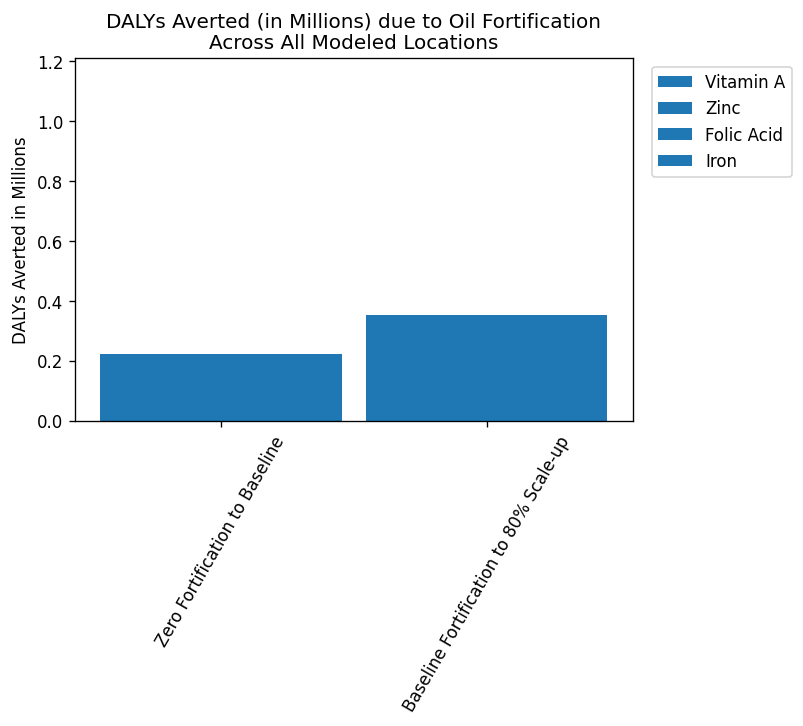

In [61]:
vehicle='oil (literature coverage data)'
f, ax = plt.subplots(dpi=120)
alt_data = (data.loc[data.col_name.isin(['Baseline to 80% coverage DALY increment','Zero fortification to baseline DALY increment'])]
            .loc[data.vehicle==vehicle]
            .loc[data.Location=='All locations'])
alt_data['mean'] = alt_data['mean'] / 1_000_000

zero = alt_data.loc[alt_data.col_name=='Baseline to 80% coverage DALY increment']
base = alt_data.loc[alt_data.col_name=='Zero fortification to baseline DALY increment']
barWidth = 0.20
spacerWidth = barWidth / 10
a = np.arange(len(zero.loc[zero.nutrient=='vitamin a']['mean']))
b = [x + barWidth + spacerWidth for x in a]
c = [x + barWidth + spacerWidth for x in b]

plt.bar(a, zero.loc[zero.nutrient=='vitamin a']['mean'], 
        width=barWidth, 
        color = 'tab:blue',
       label='Vitamin A')
plt.bar(a, zero.loc[zero.nutrient=='zinc']['mean'], 
        width=barWidth, 
        bottom = zero.loc[zero.nutrient=='vitamin a']['mean'],
        color= 'tab:orange',
       label='Zinc')
plt.bar(a, zero.loc[zero.nutrient=='folic acid']['mean'], 
        width=barWidth, 
        color='tab:green',
        label='Folic Acid',
        bottom = zero.loc[zero.nutrient=='zinc']['mean'].values + zero.loc[zero.nutrient=='vitamin a']['mean'].values)
plt.bar(a, zero.loc[zero.nutrient=='iron']['mean'], 
        width=barWidth, 
        color='tab:red',
        label='Iron',
        bottom = (zero.loc[zero.nutrient=='folic acid']['mean'].values 
         + zero.loc[zero.nutrient=='vitamin a']['mean'].values 
         + zero.loc[zero.nutrient=='zinc']['mean'].values))

plt.bar(b, base.loc[base.nutrient=='vitamin a']['mean'], 
        width=barWidth, 
        color = 'tab:blue')
plt.bar(b, base.loc[base.nutrient=='zinc']['mean'], 
        width=barWidth, 
        bottom = base.loc[base.nutrient=='vitamin a']['mean'],
        color= 'tab:orange',)
plt.bar(b, base.loc[base.nutrient=='folic acid']['mean'], 
        width=barWidth, 
        color='tab:green',
        bottom = base.loc[base.nutrient=='zinc']['mean'].values + base.loc[base.nutrient=='vitamin a']['mean'].values)
plt.bar(b, base.loc[base.nutrient=='iron']['mean'], 
        width=barWidth, 
        color='tab:red',
        bottom = (base.loc[base.nutrient=='folic acid']['mean'].values 
         + base.loc[base.nutrient=='vitamin a']['mean'].values 
         + base.loc[base.nutrient=='zinc']['mean'].values))
plt.legend(bbox_to_anchor=(1.3, 1))
plt.ylabel('DALYs Averted in Millions')
plt.ylim(0,1.21)
plt.title('DALYs Averted (in Millions) due to Oil Fortification\nAcross All Modeled Locations')
plt.xticks([a[0], b[0]], ['Zero Fortification to Baseline','Baseline Fortification to 80% Scale-up'], rotation=60)

In [39]:
data_no_salt = data.loc[data.vehicle!='salt (baseline to iodized salt coverage)'].loc[data.vehicle!='salt (iodized salt coverage to 80% of fortifiable gap)']
data_salt = data.loc[data.vehicle.isin(['salt (baseline to iodized salt coverage)','salt (iodized salt coverage to 80% of fortifiable gap)'])]
data_no_salt.head(8)

col_name,Location,vehicle,nutrient,Zero fortification DALYs,Baseline DALYs,80% coverage DALYs,Zero fortification to baseline DALY increment,Zero fortification to baseline PIF as a proportion of zero fortification DALYs,Baseline to 80% coverage DALY increment,Baseline to 80% coverage PIF as a proportion of baseline DALYs
0,All locations,maize flour,all,"24,601,359","24,471,590","24,144,696","129,769",0.5,"326,894",1.2
1,All locations,maize flour,folic acid,"5,072,802","5,037,009","4,933,144","35,794",0.7,"103,864",2.1
2,All locations,maize flour,iron,"17,589,928","17,516,371","17,340,772","73,557",0.4,"175,599",0.9
3,All locations,maize flour,vitamin a,"1,747,825","1,729,033","1,685,718","18,791",1.1,"43,316",2.5
4,All locations,maize flour,zinc,"190,804","189,177","185,062","1,627",0.8,"4,115",2.1
5,All locations,oil (industry coverage data),all,"24,823,335","24,471,590","24,187,279","351,745",1.4,"284,311",1.2
8,All locations,oil (industry coverage data),vitamin a,"2,080,779","1,729,033","1,444,723","351,745",15.9,"284,311",16.6
10,All locations,oil (literature coverage data),all,"24,823,335","24,471,590","24,250,278","351,745",1.4,"221,312",0.9


In [40]:
data_no_salt.to_excel('results_plots/table_shell_4_19_21.xlsx')

In [41]:
salt = data_salt

salt_base = (salt.loc[salt.vehicle=='salt (baseline to iodized salt coverage)']
             .rename(columns={'80% coverage DALYs':'Iodized coverage DALYs',
                             'Baseline to 80% coverage DALY increment':
                                  'Baseline to iodized coverage DALY increment',
                             'Baseline to 80% coverage PIF as a proportion of baseline DALYs':
                                  'Baseline to iodized coverage PIF as a proportion of baseline DALYs'})
            .drop(columns='vehicle'))
salt_base['vehicle'] = 'salt'
salt_fort = (salt.loc[salt.vehicle=='salt (iodized salt coverage to 80% of fortifiable gap)']
                .drop(columns=['Zero fortification DALYs',
                              'Baseline DALYs','vehicle','Zero fortification to baseline DALY increment',
                              'Zero fortification to baseline PIF as a proportion of zero fortification DALYs'])
             .rename(columns={'80% coverage DALYs':'80% of gap between iodized coverage and 100% DALYs',
                             'Baseline to 80% coverage DALY increment':
                                  '80% of gap between iodized coverage and 100% DALY increment',
                             'Baseline to 80% coverage PIF as a proportion of baseline DALYs':
                                  '80% of gap between iodized coverage and 100% PIF as a proportion of baseline DALYs'})
             )
salt_fort['vehicle'] = 'salt'
salt = salt_base.merge(salt_fort, on=['Location','vehicle','nutrient'])
salt['vehicle'] = 'salt'

salt

col_name,Location,nutrient,Zero fortification DALYs,Baseline DALYs,Iodized coverage DALYs,Zero fortification to baseline DALY increment,Zero fortification to baseline PIF as a proportion of zero fortification DALYs,Baseline to iodized coverage DALY increment,Baseline to iodized coverage PIF as a proportion of baseline DALYs,vehicle,80% of gap between iodized coverage and 100% DALYs,80% of gap between iodized coverage and 100% DALY increment,80% of gap between iodized coverage and 100% PIF as a proportion of baseline DALYs
0,All locations,all,"24,471,590","24,471,590","23,102,082",0,0.0,"1,369,507",5.7,salt,"22,828,730","1,642,860",6.8
1,All locations,folic acid,"5,037,009","5,037,009","3,667,501",0,0.0,"1,369,507",27.3,salt,"3,394,149","1,642,860",32.8
2,Angola,all,"267,041","267,041","234,836",0,0,"32,205",12.0,salt,"233,457","33,584",12.5
3,Angola,folic acid,"101,658","101,658","69,453",0,0,"32,205",31.9,salt,"68,074","33,584",33.3
4,Bangladesh,all,"661,988","661,988","629,876",0,0,"32,112",4.8,salt,"624,281","37,707",5.7
5,Bangladesh,folic acid,"105,014","105,014","72,902",0,0,"32,112",30.5,salt,"67,307","37,707",35.8
6,Burkina Faso,all,"469,958","469,958","413,198",0,0.0,"56,760",11.8,salt,"404,764","65,194",13.6
7,Burkina Faso,folic acid,"215,013","215,013","158,253",0,0.0,"56,760",27.5,salt,"149,819","65,194",31.5
8,Cameroon,all,"282,547","282,547","260,273",0,0,"22,275",7.9,salt,"251,248","31,299",11.0
9,Cameroon,folic acid,"100,863","100,863","78,588",0,0,"22,275",22.5,salt,"69,564","31,299",31.6


In [42]:
#data_no_salt.to_excel('results_plots/table_shell_4_14_21.xlsx')
salt.to_excel('results_plots/table_shell_salt_4_14_21.xlsx')

# add in coverage

In [ ]:
assert 0==2, 'stop running'

In [ ]:
coverage_data_dir = '/ihme/homes/alibow/notebooks/vivarium_research_lsff/data_prep/outputs/waterfall_coverage_all_vehicles.csv'
coverage_levels = [0.2,0.5,0.8,1]
years = [2021,2022,2023,2024,2025]

coverage_fin = pd.DataFrame()
for nutrient in ['vitamin a','zinc','folic acid','iron']:
    if nutrient == 'vitamin a':
        vehicles = ['oil','wheat flour','maize flour','industry oil','industry wheat']
        subgroups = ['U5']
    elif nutrient == 'folic acid':
        vehicles = ['wheat flour','maize flour','industry wheat','salt','industry salt']
        subgroups = ['WRA']
    elif nutrient == 'iron':
        subgroups = ['U5','WRA']
        vehicles = ['wheat flour','maize flour','industry wheat']
    else:
        vehicles = ['wheat flour','maize flour','industry wheat']
        subgroups = ['U5']
        
        
    for vehicle in vehicles:
        for subgroup in subgroups:
            print(f'calculating {nutrient}/{vehicle}')
            cov_a, cov_b = generate_logical_coverage_draws(coverage_data_dir, location_ids, nutrient, vehicle, subgroup)
            baseline_coverage, counterfactual_coverage = generate_coverage_dfs(cov_a, cov_b, years, coverage_levels)
            baseline_coverage['coverage_level'] = 'baseline'
            cov_b['coverage_level'] = 'maximum'
            coverage = pd.concat([baseline_coverage.reset_index(),
                                  counterfactual_coverage.reset_index(),
                                  cov_b.reset_index()], ignore_index=True)
            coverage['nutrient'] = nutrient
            coverage['vehicle'] = vehicle
            coverage['subgroup'] = subgroup
            coverage_fin = pd.concat([coverage, coverage_fin], ignore_index=True)

coverage_fin.head()

In [ ]:
coverage_fin.to_pickle('results_raw/coverage_final.pkl')

In [ ]:
cov

In [ ]:
cov_prepped.head()

In [ ]:
cov_prepped.loc[cov_prepped.vehicle=='industry salt'].loc[cov_prepped.location_id==214]

In [ ]:
cov_prepped.loc[cov_prepped.vehicle=='salt'].loc[cov_prepped.location_id==214]